In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

%matplotlib inline

In [2]:
entrenamiento_df = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')

In [3]:
entrenamiento_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
entrenamiento_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [5]:
entrenamiento_df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [6]:
# Reemplazo el error en el espaciado de las keyword
entrenamiento_df['keyword'] = entrenamiento_df['keyword'].str.replace('%20', ' ')
entrenamiento_df.keyword.value_counts()

fatalities             45
deluge                 42
armageddon             42
sinking                41
damage                 41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: keyword, Length: 221, dtype: int64

In [7]:
entrenamiento_df['location'].value_counts()

USA               104
New York           71
United States      50
London             45
Canada             29
                 ... 
17th Dimension      1
Ocean City, NJ      1
Guatemala           1
Louisiana, USA      1
Starling City       1
Name: location, Length: 3341, dtype: int64

In [8]:
# Agrupo USA y United States
entrenamiento_df['location'] = entrenamiento_df['location'].replace({'United States':'USA'})
entrenamiento_df['location'].value_counts()

USA               154
New York           71
London             45
Canada             29
Nigeria            28
                 ... 
11/4/14             1
17th Dimension      1
Ocean City, NJ      1
Guatemala           1
Starling City       1
Name: location, Length: 3340, dtype: int64

In [9]:
entrenamiento_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# Quito la columna 'text' y la reemplazo por la columna  
# 'longitud_text' que contiene la longitud de la columna 'text'. 
entrenamiento_df['text']=entrenamiento_df['text'].astype(str)
entrenamiento_df['longitud_text']=entrenamiento_df.text.str.len()
entrenamiento_df.head(10)

,id,keyword,location,text,target,longitud_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


Text(0, 0.5, 'Densidad')

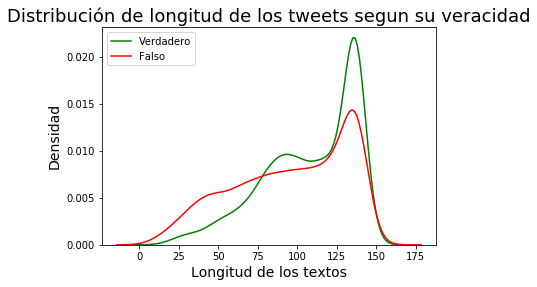

In [11]:
# Hago un plot de la longitud de textos por target
plot = sns.distplot(entrenamiento_df[entrenamiento_df['target']== 1]['longitud_text'], color = 'green',hist=False, rug=False, label = 'Verdadero')
plot = sns.distplot(entrenamiento_df[entrenamiento_df['target']== 0]['longitud_text'], color = 'red',hist=False, rug=False, label = 'Falso')
plot.set_title("Distribución de longitud de los tweets segun su veracidad",size=18)
plot.set_xlabel('Longitud de los textos', size=14)
plot.set_ylabel('Densidad',size=14)

In [12]:
# Agrupo por target y longitud del texto (promedio y cantidad). 
longitud_target = entrenamiento_df.loc[:,['longitud_text','target']].groupby('target')\
                .agg(['mean','count'])
longitud_target

longitud_text      
                mean count
target                    
0          95.706817  4342
1         108.113421  3271

In [13]:
# acomodo las columnas
level0 = longitud_target.columns.get_level_values(0)
level1 = longitud_target.columns.get_level_values(1)
longitud_target.columns= level0 + '_' + level1
longitud_target =longitud_target.reset_index()
longitud_target

,target,longitud_text_mean,longitud_text_count
0,0,95.706817,4342
1,1,108.113421,3271


In [14]:
# Reemplazo los valores de la columna target por otros mas descriptivos
longitud_target['target'] = longitud_target['target'].map({1: 'Verdadero', 0: 'Falso'})
longitud_target

,target,longitud_text_mean,longitud_text_count
0,Falso,95.706817,4342
1,Verdadero,108.113421,3271


Text(0, 0.5, 'Longitud en caracteres')

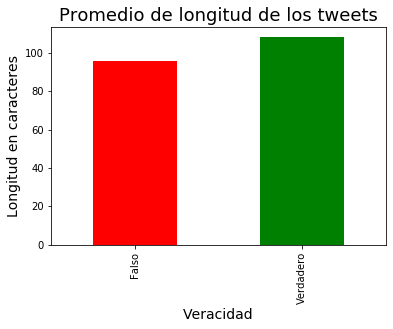

In [15]:
# Grafico de promedio de longitud de los textos, por target
longitud_target = longitud_target.set_index('target')
g = longitud_target['longitud_text_mean'].plot(kind = 'bar', color = ['red' , 'green'])
plt.title('Promedio de longitud de los tweets', size = 18)
plt.xlabel('Veracidad', size = 14)
plt.ylabel('Longitud en caracteres', size = 14)

Text(0, 0.5, 'Palabra Clave')

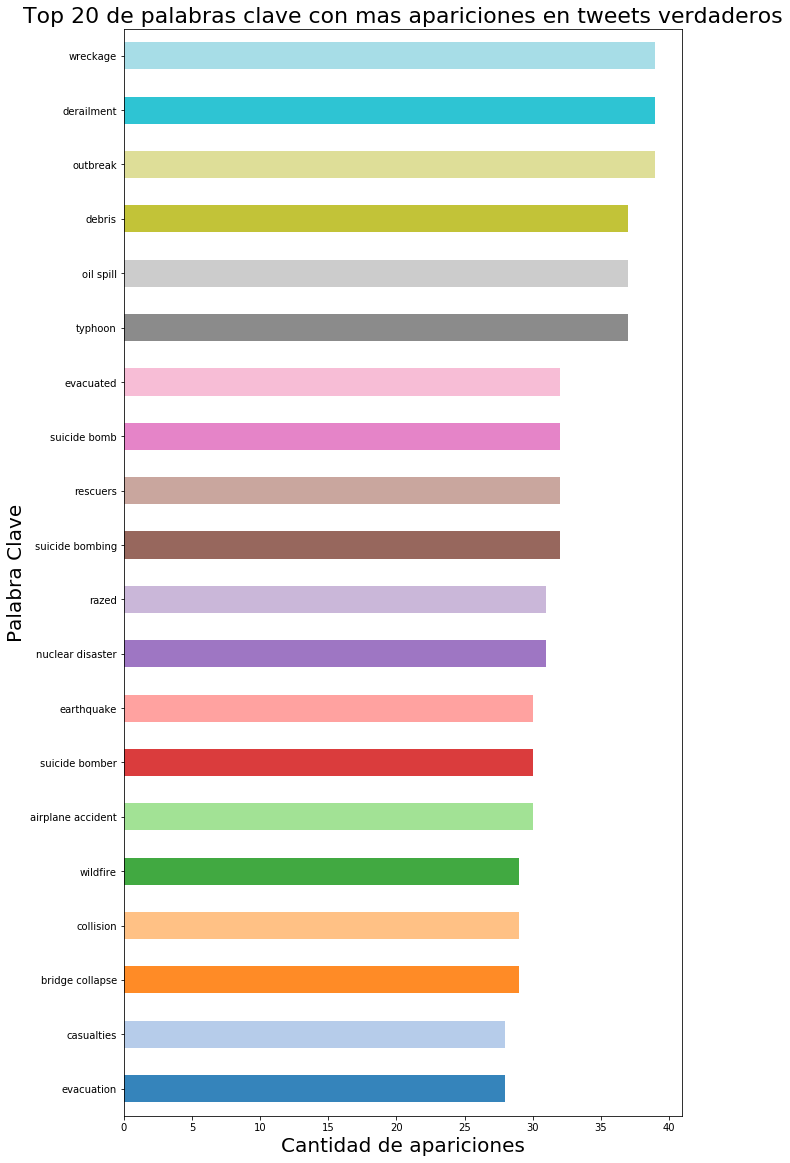

In [16]:
# Grafico con las primeras 20 keyword mas usadas de Target 1.
plt.figure(figsize=(10, 20)) 
entrenamiento_df.keyword[entrenamiento_df.target == 1].value_counts().sort_values().tail(20)\
        .plot(kind='barh', alpha=0.9, color=plt.cm.tab20(np.arange(20)))
plt.title('Top 20 de palabras clave con mas apariciones en tweets verdaderos', size=22)
plt.xlabel('Cantidad de apariciones', size=20)
plt.ylabel('Palabra Clave',size=20)

Text(0, 0.5, 'Palabra Clave')

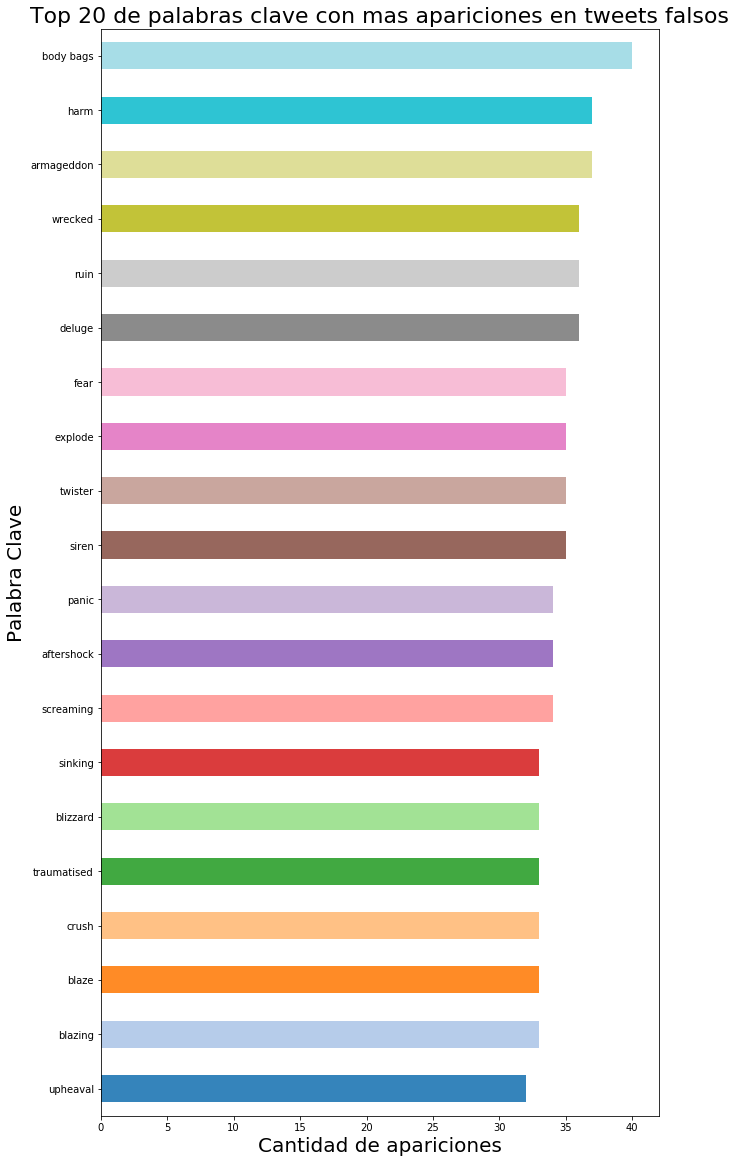

In [17]:
# Grafico con las primeras 20 keyword mas usadas de Target 0. 
plt.figure(figsize=(10, 20)) 
entrenamiento_df.keyword[entrenamiento_df.target == 0].value_counts().sort_values().tail(20)\
        .plot(kind='barh', alpha=0.9, color=plt.cm.tab20(np.arange(20)))
plt.title('Top 20 de palabras clave con mas apariciones en tweets falsos', size=22)
plt.xlabel('Cantidad de apariciones', size=20)
plt.ylabel('Palabra Clave',size=20)

### Largo del tweet para las 5 localidades con más tweets verdaderos

In [18]:
df_localidad = entrenamiento_df.groupby('location').agg({'target':['sum','count']})
df_localidad.columns = ['verdaderos','totales']
df_localidad = df_localidad.sort_values('totales', ascending=False)
df_localidad.head()

,verdaderos,totales
location,,
USA,94,154
New York,16,71
London,16,45
Canada,13,29
Nigeria,22,28


In [19]:
df_localidad['falsos'] = df_localidad['totales'] - df_localidad['verdaderos']
del df_localidad['totales']
df_localidad.head()

,verdaderos,falsos
location,,
USA,94,60
New York,16,55
London,16,29
Canada,13,16
Nigeria,22,6


In [20]:
# Me quedo con los 5 de mayor cantidad
localidades = df_localidad.sort_values('verdaderos', ascending=False).reset_index().loc[0:4,'location']
localidades

0        USA
1    Nigeria
2      India
3     Mumbai
4     London
Name: location, dtype: object

In [21]:
df_lugares_verdaderos = entrenamiento_df[entrenamiento_df['location'].isin(localidades)].copy()
df_lugares_verdaderos.shape

(273, 6)

In [22]:
df_lugares_verdaderos['longitud'] = df_lugares_verdaderos['text'].agg(lambda x: len(x))
df_lugares_verdaderos = df_lugares_verdaderos.groupby(['longitud','location'])\
    .agg({'longitud':['count']}).reset_index()
df_lugares_verdaderos.columns = ['longitud','location','cantidad']
df_lugares_verdaderos.head()

,longitud,location,cantidad
0,12,London,1
1,24,USA,1
2,33,London,1
3,34,London,1
4,34,USA,1


In [23]:
# Agrupo las longitudes en grupos de 10
df_lugares_verdaderos['grupo'] = df_lugares_verdaderos['longitud'].agg(lambda x: int(x/10)*10)
df_lugares_verdaderos.head()

,longitud,location,cantidad,grupo
0,12,London,1,10
1,24,USA,1,20
2,33,London,1,30
3,34,London,1,30
4,34,USA,1,30


In [24]:
df_lugares_verdaderos = df_lugares_verdaderos.groupby(['grupo','location'])['cantidad']\
                                            .agg('sum').reset_index()
df_lugares_verdaderos.head()

,grupo,location,cantidad
0,10,London,1
1,20,USA,1
2,30,London,3
3,30,USA,2
4,40,London,1


In [25]:
df_lugares_verdaderos = pd.pivot_table(df_lugares_verdaderos, index='grupo', columns='location', values='cantidad', fill_value=0)

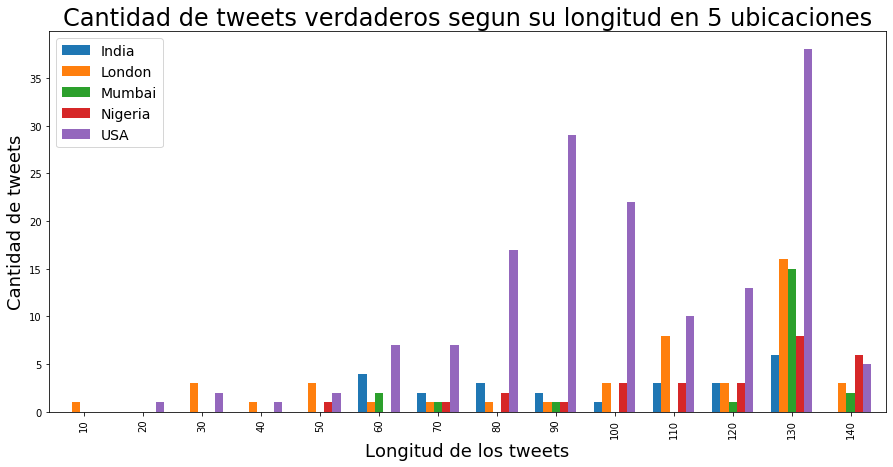

In [26]:
grafico = df_lugares_verdaderos.plot(kind='bar', figsize=(15,7), width=0.7)
grafico.set_title('Cantidad de tweets verdaderos segun su longitud en 5 localidades',fontsize=24)
grafico.set_xlabel('Longitud de los tweets',fontsize=18)
grafico.set_ylabel('Cantidad de tweets',fontsize=18)
grafico.legend(fontsize=14)

### Longitud del tweet según la cantidad de palabras que contiene de las 5 localidades con mas tweets

In [27]:
entrenamiento_df['words_count'] = entrenamiento_df['text'].apply(lambda x: len(x.split(' ')))

In [28]:
entrenamiento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             7613 non-null   int64 
 1   keyword        7552 non-null   object
 2   location       5080 non-null   object
 3   text           7613 non-null   object
 4   target         7613 non-null   int64 
 5   longitud_text  7613 non-null   int64 
 6   words_count    7613 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 416.5+ KB


In [29]:
scatter_df = entrenamiento_df
scatter_df['location'] = scatter_df['location'].fillna('Sin localidad')
scatter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             7613 non-null   int64 
 1   keyword        7552 non-null   object
 2   location       7613 non-null   object
 3   text           7613 non-null   object
 4   target         7613 non-null   int64 
 5   longitud_text  7613 non-null   int64 
 6   words_count    7613 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 416.5+ KB


In [30]:
scatter_df['location'].value_counts()

Sin localidad     2533
USA                154
New York            71
London              45
Canada              29
                  ... 
11/4/14              1
17th Dimension       1
Ocean City, NJ       1
Guatemala            1
#WhereverI'mAt       1
Name: location, Length: 3341, dtype: int64

In [31]:
scatter_df[scatter_df['words_count']<4].groupby(['words_count','target']).agg({'target':['count']})

target
                    count
words_count target       
1           0           8
2           0          32
            1           9
3           0          63
            1          12

In [32]:
# Me quedo con los textos que tienen mas de 3 palabras
scatter_df = scatter_df[scatter_df['words_count']>3]
scatter_df['location'].value_counts()

Sin localidad     2479
USA                153
New York            70
London              44
Canada              29
                  ... 
17th Dimension       1
Ocean City, NJ       1
Guatemala            1
Louisiana, USA       1
Starling City        1
Name: location, Length: 3294, dtype: int64

In [33]:
scatter_df['total'] = 1
location = scatter_df.groupby('location').agg({'total':'sum'})
location.columns = ['total']

location

/home/elnic10/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total
location,
,1
Glasgow,1
"Melbourne, Australia",1
News,1
å_,1
...,...
å_: ?? ÌÑ ? : ?,1
å_å_Los Mina Cityã¢,1
å¡å¡Midwest Û¢Û¢,1


In [34]:
location = location.sort_values('total',ascending=False).reset_index().loc[0:4,'location']
location

0    Sin localidad
1              USA
2         New York
3           London
4           Canada
Name: location, dtype: object

In [35]:
scatter_df = scatter_df[scatter_df['location'].isin(location)]
scatter_df.head()

,id,keyword,location,text,target,longitud_text,words_count,total
0,1,NaN,Sin localidad,Our Deeds are the Reason of this #earthquake M...,1,69,13,1
1,4,NaN,Sin localidad,Forest fire near La Ronge Sask. Canada,1,38,7,1
2,5,NaN,Sin localidad,All residents asked to 'shelter in place' are ...,1,133,22,1
3,6,NaN,Sin localidad,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,NaN,Sin localidad,Just got sent this photo from Ruby #Alaska as ...,1,88,17,1


In [36]:
scatter_df = scatter_df.rename(columns = {'location':'Localidad'})
scatter_df.head()

,id,keyword,Localidad,text,target,longitud_text,words_count,total
0,1,NaN,Sin localidad,Our Deeds are the Reason of this #earthquake M...,1,69,13,1
1,4,NaN,Sin localidad,Forest fire near La Ronge Sask. Canada,1,38,7,1
2,5,NaN,Sin localidad,All residents asked to 'shelter in place' are ...,1,133,22,1
3,6,NaN,Sin localidad,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,NaN,Sin localidad,Just got sent this photo from Ruby #Alaska as ...,1,88,17,1


Text(0.5, 21.706249999999983, 'Cantidad de palabras de un tweet')

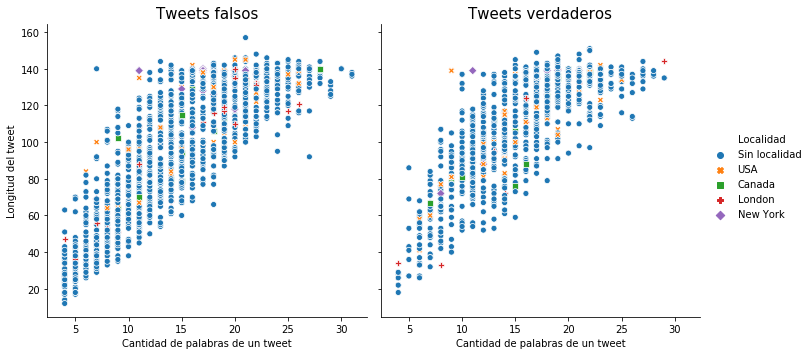

In [37]:
g = sns.relplot(x="words_count", y="longitud_text",
              col="target", hue="Localidad", style="Localidad", 
            kind="scatter", data=scatter_df).axes.flatten()


g[0].set_title("Tweets falsos",fontsize=15)
g[1].set_title("Tweets verdaderos",fontsize=15)
g[0].set_ylabel("Longitud del tweet",fontsize=10)
g[0].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)
g[1].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)

#### El gráfico termina siendo confuso ya que la mayor cantidad de tweets emitidos no poseen valores en la columna Localidad

In [38]:
# Vamos a eliminar esos valores nulos para determinar si el valor en esa columna es relevante
entrenamiento_df['words_count'] = entrenamiento_df['text'].apply(lambda x: len(x.split(' ')))
scatter_df = entrenamiento_df
scatter_df = entrenamiento_df.dropna(subset=['location'])
scatter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             7613 non-null   int64 
 1   keyword        7552 non-null   object
 2   location       7613 non-null   object
 3   text           7613 non-null   object
 4   target         7613 non-null   int64 
 5   longitud_text  7613 non-null   int64 
 6   words_count    7613 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 475.8+ KB


In [39]:
scatter_df = scatter_df.loc[:,['location','target','longitud_text','words_count']]
scatter_df.head()

,location,target,longitud_text,words_count
0,Sin localidad,1,69,13
1,Sin localidad,1,38,7
2,Sin localidad,1,133,22
3,Sin localidad,1,65,9
4,Sin localidad,1,88,17


In [40]:
# Se observa la cantidad de tweets verdaderos con menos de 4 palabras 
scatter_df[scatter_df['words_count']<4].groupby(['words_count','target']).agg({'target':['count']})

target
                    count
words_count target       
1           0           8
2           0          32
            1           9
3           0          63
            1          12

In [41]:
# Menos cantidad de palabras mas probable de que sea falso -> Una palabra no puede es ambigua 
# ya que no especifica a que hace referencia, se van a desestimar en el siguiente analisis
scatter_df = scatter_df[scatter_df['words_count']>3]
scatter_df['location'].value_counts()

Sin localidad     2479
USA                153
New York            70
London              44
Canada              29
                  ... 
17th Dimension       1
Ocean City, NJ       1
Guatemala            1
Louisiana, USA       1
Starling City        1
Name: location, Length: 3294, dtype: int64

In [42]:
scatter_df['total'] = 1
location = scatter_df.groupby('location').agg({'total':'sum'})
location.columns = ['total']

location

,total
location,
,1
Glasgow,1
"Melbourne, Australia",1
News,1
å_,1
...,...
å_: ?? ÌÑ ? : ?,1
å_å_Los Mina Cityã¢,1
å¡å¡Midwest Û¢Û¢,1


In [43]:
location = location.sort_values('total',ascending=False).reset_index().loc[0:4,'location']
location

0    Sin localidad
1              USA
2         New York
3           London
4           Canada
Name: location, dtype: object

In [44]:
scatter_df = scatter_df[scatter_df['location'].isin(location)]
scatter_df.head()

,location,target,longitud_text,words_count,total
0,Sin localidad,1,69,13,1
1,Sin localidad,1,38,7,1
2,Sin localidad,1,133,22,1
3,Sin localidad,1,65,9,1
4,Sin localidad,1,88,17,1


In [45]:
scatter_df = scatter_df.rename(columns = {'location':'Localidad'})
scatter_df.head()

,Localidad,target,longitud_text,words_count,total
0,Sin localidad,1,69,13,1
1,Sin localidad,1,38,7,1
2,Sin localidad,1,133,22,1
3,Sin localidad,1,65,9,1
4,Sin localidad,1,88,17,1


Text(0.5, 21.706249999999983, 'Cantidad de palabras de un tweet')

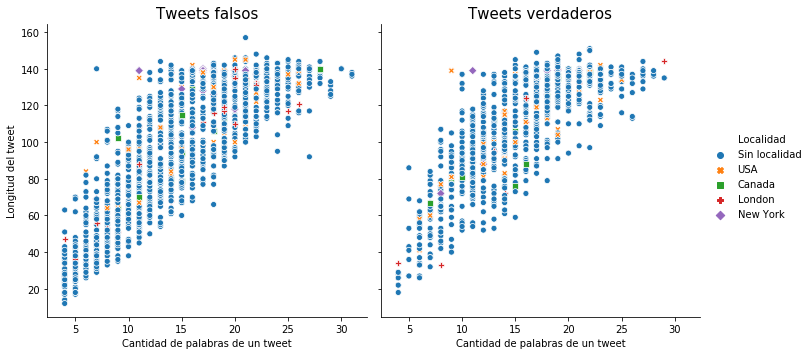

In [46]:
g = sns.relplot(x="words_count", y="longitud_text",
              col="target", hue="Localidad", style="Localidad", 
            kind="scatter", data=scatter_df).axes.flatten()


g[0].set_title("Tweets falsos",fontsize=15)
g[1].set_title("Tweets verdaderos",fontsize=15)
g[0].set_ylabel("Longitud del tweet",fontsize=10)
g[0].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)
g[1].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)

## Longitud del tweet según la cantidad de palabras que contiene de las 5 palabras clave con mas tweets

In [47]:
# Analisis similar al de las localidades con la diferencia que para las keyword nan se van 
# a llenar con un valor por defecto
scatter_df = entrenamiento_df.copy()
scatter_df['keyword'] = entrenamiento_df['keyword'].fillna('Sin palabra clave')
scatter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             7613 non-null   int64 
 1   keyword        7613 non-null   object
 2   location       7613 non-null   object
 3   text           7613 non-null   object
 4   target         7613 non-null   int64 
 5   longitud_text  7613 non-null   int64 
 6   words_count    7613 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 416.5+ KB


In [48]:
scatter_df['keyword'].value_counts()

Sin palabra clave      61
fatalities             45
armageddon             42
deluge                 42
body bags              41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: keyword, Length: 222, dtype: int64

In [49]:
scatter_df['total'] = 1
keyword = scatter_df.groupby('keyword').agg({'total':'sum'})
keyword.columns = ['total']

keyword

,total
keyword,
Sin palabra clave,61
ablaze,36
accident,35
aftershock,34
airplane accident,35
...,...
wounded,37
wounds,33
wreck,37


In [50]:
keyword = keyword.sort_values('total',ascending=False).reset_index().loc[0:4,'keyword']
keyword

0    Sin palabra clave
1           fatalities
2               deluge
3           armageddon
4              sinking
Name: keyword, dtype: object

In [51]:
# Se puede observar que los nulo de la columna location pudo inluir en los resultados 
# del grafico anterior ya que estos poseian una mayor cantidad que los nan de keyword
scatter_df = scatter_df[scatter_df['keyword'].isin(keyword)]
scatter_df.head()

,id,keyword,location,text,target,longitud_text,words_count,total
0,1,Sin palabra clave,Sin localidad,Our Deeds are the Reason of this #earthquake M...,1,69,13,1
1,4,Sin palabra clave,Sin localidad,Forest fire near La Ronge Sask. Canada,1,38,7,1
2,5,Sin palabra clave,Sin localidad,All residents asked to 'shelter in place' are ...,1,133,22,1
3,6,Sin palabra clave,Sin localidad,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,Sin palabra clave,Sin localidad,Just got sent this photo from Ruby #Alaska as ...,1,88,17,1


In [52]:
scatter_df = scatter_df.rename(columns = {'keyword':'Palabra Clave'})
scatter_df.head()

,id,Palabra Clave,location,text,target,longitud_text,words_count,total
0,1,Sin palabra clave,Sin localidad,Our Deeds are the Reason of this #earthquake M...,1,69,13,1
1,4,Sin palabra clave,Sin localidad,Forest fire near La Ronge Sask. Canada,1,38,7,1
2,5,Sin palabra clave,Sin localidad,All residents asked to 'shelter in place' are ...,1,133,22,1
3,6,Sin palabra clave,Sin localidad,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,Sin palabra clave,Sin localidad,Just got sent this photo from Ruby #Alaska as ...,1,88,17,1


Text(0.5, 21.706249999999983, 'Cantidad de palabras de un tweet')

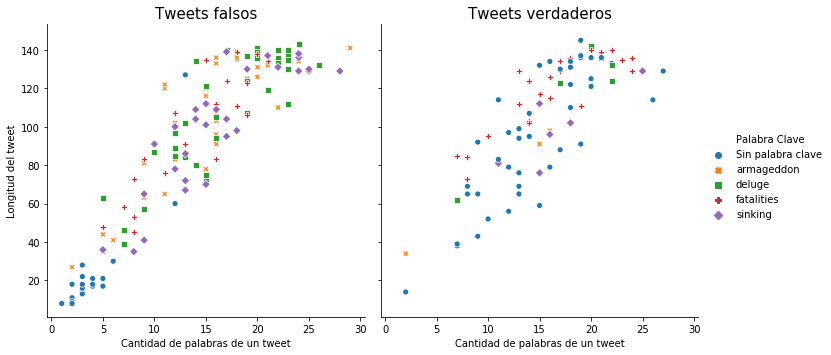

In [53]:
g = sns.relplot(x="words_count", y="longitud_text",
              col="target", hue="Palabra Clave", style="Palabra Clave", 
            kind="scatter", data=scatter_df).axes.flatten()


g[0].set_title("Tweets falsos",fontsize=15)
g[1].set_title("Tweets verdaderos",fontsize=15)
g[0].set_ylabel("Longitud del tweet",fontsize=10)
g[0].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)
g[1].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)

### Cantidad de tweets verdaderos y falsos según cantidad de numerales

In [54]:
df_numerales = entrenamiento_df.copy()

In [55]:
df_numerales['numerales'] = df_numerales['text'].agg(lambda x: x.count('#'))
df_numerales.head()

,id,keyword,location,text,target,longitud_text,words_count,numerales
0,1,NaN,Sin localidad,Our Deeds are the Reason of this #earthquake M...,1,69,13,1
1,4,NaN,Sin localidad,Forest fire near La Ronge Sask. Canada,1,38,7,0
2,5,NaN,Sin localidad,All residents asked to 'shelter in place' are ...,1,133,22,0
3,6,NaN,Sin localidad,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,NaN,Sin localidad,Just got sent this photo from Ruby #Alaska as ...,1,88,17,2


In [56]:
df_numerales = df_numerales.groupby('numerales')['target'].agg(['sum','count'])

In [57]:
df_numerales.columns = ['verdaderos','total']
df_numerales['falsos'] = df_numerales['total'] - df_numerales['verdaderos']
del df_numerales['total']

In [58]:
df_numerales

,verdaderos,falsos
numerales,,
0,2396,3456
1,482,482
2,203,202
3,100,108
4,38,45
5,23,18
6,7,19
7,4,4
8,7,1


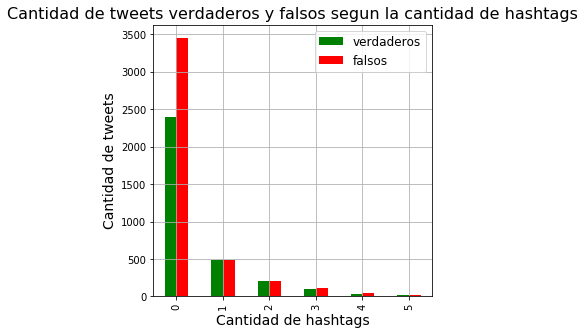

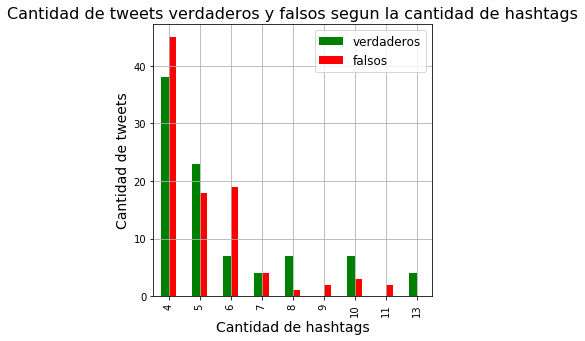

In [59]:
grafico1 = df_numerales.iloc[0:6].plot(kind='bar', grid=True, figsize=(5,5), color=['green','red'])
grafico1.set_title('Cantidad de tweets verdaderos y falsos segun la cantidad de hashtags',fontsize=16)
grafico1.set_xlabel('Cantidad de hashtags',fontsize=14)
grafico1.set_ylabel('Cantidad de tweets',fontsize=14)
grafico1.legend(fontsize=12)

grafico2 = df_numerales.iloc[4:].plot(kind='bar', grid=True, figsize=(5,5), color=['green','red'])
grafico2.set_title('Cantidad de tweets verdaderos y falsos segun la cantidad de hashtags',fontsize=16)
grafico2.set_xlabel('Cantidad de hashtags',fontsize=14)
grafico2.set_ylabel('Cantidad de tweets',fontsize=14)
grafico2.legend(fontsize=12)

### Las 30 palabras más usadas en tweets verdaderos y las 30 mas usadas en tweets falsos

In [60]:
tweets_verdaderos = entrenamiento_df[entrenamiento_df['target'] == 1]
tweets_verdaderos.shape

(3271, 7)

In [61]:
tweets_falsos = entrenamiento_df[entrenamiento_df['target'] == 0]
tweets_falsos.shape

(4342, 7)

In [62]:
pal_tweets_verdaderos = tweets_verdaderos['text'].agg(lambda x: x.split())
pal_tweets_falsos = tweets_falsos['text'].agg(lambda x: x.split())
pal_tweets_verdaderos.head()

0    [Our, Deeds, are, the, Reason, of, this, #eart...
1       [Forest, fire, near, La, Ronge, Sask., Canada]
2    [All, residents, asked, to, 'shelter, in, plac...
3    [13,000, people, receive, #wildfires, evacuati...
4    [Just, got, sent, this, photo, from, Ruby, #Al...
Name: text, dtype: object

In [63]:
palabras = []
for texto in pal_tweets_verdaderos:
    for i in range(0,len(texto)):
        palabras.append(texto[i])
df_palabras_verdaderas = pd.DataFrame(palabras)
df_palabras_verdaderas.shape

(49613, 1)

In [64]:
palabras = []
for texto in pal_tweets_falsos:
    for i in range(0,len(texto)):
        palabras.append(texto[i])
df_palabras_falsas = pd.DataFrame(palabras)
df_palabras_falsas.shape

(63848, 1)

In [65]:
df_palabras_verdaderas['target'] = 1
df_palabras_falsas['target'] = 0

In [66]:
df_palabras = df_palabras_verdaderas.append(df_palabras_falsas)
df_palabras.columns = ['palabra','target']
df_palabras.head()

,palabra,target
0,Our,1
1,Deeds,1
2,are,1
3,the,1
4,Reason,1


In [67]:
# Me quedo con las palabras que tienen mas de 5 letras
df_palabras['longitud'] = df_palabras['palabra'].agg(lambda x: len(x))
df_palabras = df_palabras[df_palabras['longitud'] > 5]
df_palabras.head()

,palabra,target,longitud
4,Reason,1,6
7,#earthquake,1,11
10,Forgive,1,7
13,Forest,1,6
19,Canada,1,6


In [68]:
grupo_palabras = df_palabras.groupby('palabra')['target'].agg(['sum','count'])
grupo_palabras['falsos'] = grupo_palabras['count'] - grupo_palabras['sum']
del grupo_palabras['count']
grupo_palabras.columns = ['verdaderos','falsos']
grupo_palabras.head()

,verdaderos,falsos
palabra,,
!!!!!!!!!!!#MetroFmTalk,0,1
##book,0,1
##fukushima,0,1
##youtube,1,0
#1-1ST,0,1


In [69]:
df_palabras_ordenadas = grupo_palabras.sort_values('verdaderos', ascending=False)

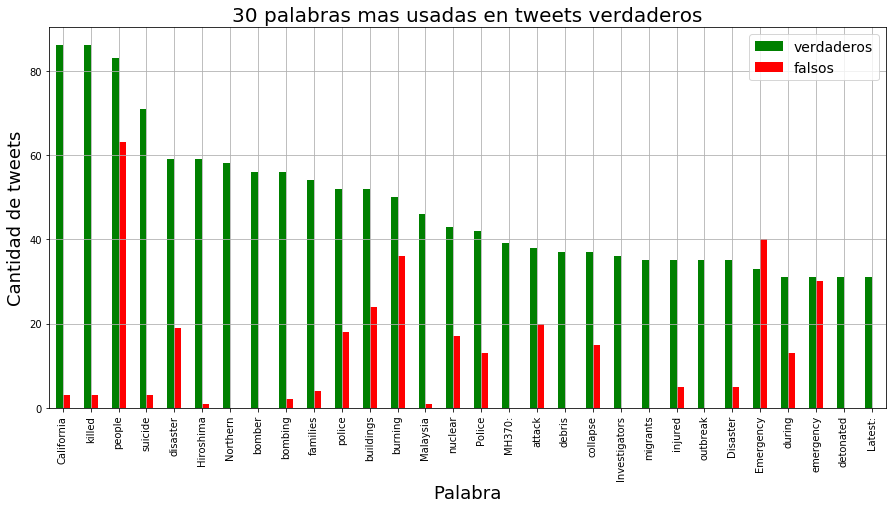

In [70]:
grafico = df_palabras_ordenadas.iloc[0:30].plot(kind='bar', grid=True, figsize=(15,7), color=['green','red'])
grafico.set_title('30 palabras mas usadas en tweets verdaderos',fontsize=20)
grafico.set_xlabel('Palabra',fontsize=18)
grafico.set_ylabel('Cantidad de tweets',fontsize=18)
grafico.legend(fontsize=14)

In [71]:
df_palabras_ordenadas = grupo_palabras.sort_values('falsos', ascending=False)

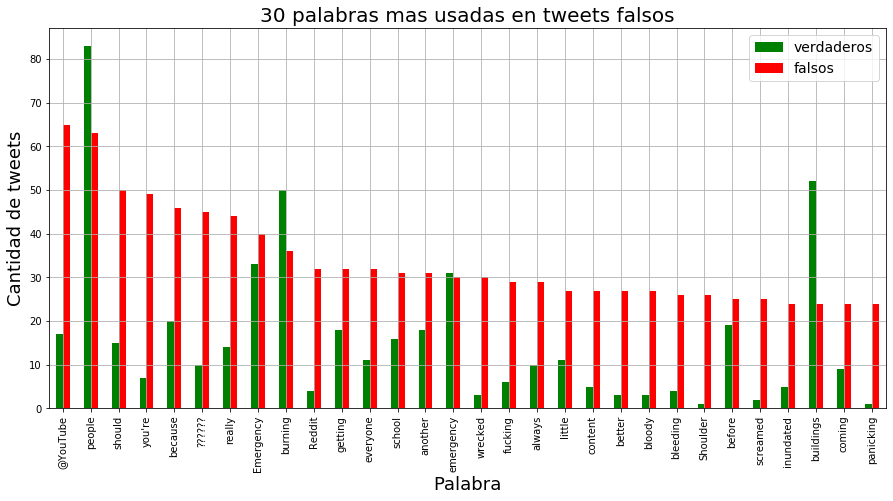

In [72]:
grafico = df_palabras_ordenadas.iloc[0:30].plot(kind='bar', grid=True, figsize=(15,7), color=['green','red'])
grafico.set_title('30 palabras mas usadas en tweets falsos', fontsize=20)
grafico.set_xlabel('Palabra',fontsize=18)
grafico.set_ylabel('Cantidad de tweets',fontsize=18)
grafico.legend(fontsize=14)